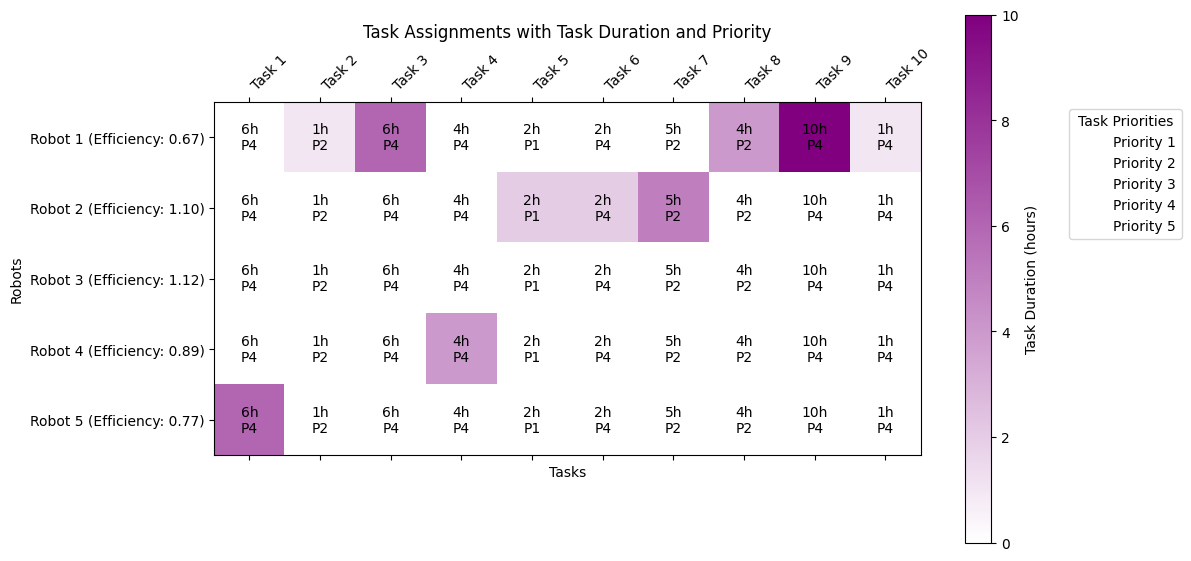

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

# Set random seed for reproducibility
np.random.seed(None)

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    """
    Placeholder for GA implementation.

    Students should implement their GA logic here, including initialization,
    evaluation (fitness function), selection, crossover, and mutation.

    The function should return the best solution found by the GA, which is
    an array indicating the robot assigned to each task.
    """
    # Placeholder for the initial population generation
    # Placeholder for the fitness function calculation
    # Placeholder for the selection process
    # Placeholder for the crossover operation
    # Placeholder for the mutation operation

    # Example of a random solution for demonstration purposes
    best_solution = np.random.randint(len(robot_efficiencies), size=len(task_durations))
    return best_solution

# Fitness function calculation
def calculate_fitness(solution, task_durations, task_priorities, robot_efficiencies):
    total_times = np.zeros(len(robot_efficiencies))
    for task_idx, robot_idx in enumerate(solution):
        total_times[robot_idx] += task_durations[task_idx] / robot_efficiencies[robot_idx]
    total_production_time = np.max(total_times)
    workload_balance = np.std(total_times)
    fitness = total_production_time + workload_balance
    return fitness

# Selection process using tournament selection
def tournament_selection(population, task_durations, task_priorities, robot_efficiencies):
    k = 5  # Tournament size
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        tournament_indices = np.random.choice(len(population), size=k, replace=False)
        tournament_population = [population[i] for i in tournament_indices]
        tournament_fitness = [calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in tournament_population]
        winner_index = tournament_indices[np.argmin(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

# Single-point crossover
def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Task swapping mutation
def task_swapping_mutation(individual):
    mutation_rate = 0.1  # Mutation rate
    if np.random.rand() < mutation_rate:
        idx1, idx2 = np.random.choice(len(individual), size=2, replace=False)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "purple"])

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task duration and priority
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f'{task_durations[j]}h\nP{task_priorities[j]}', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)